Shape of X:  (4, 256, 256, 3)
Shape of y:  (4, 6)


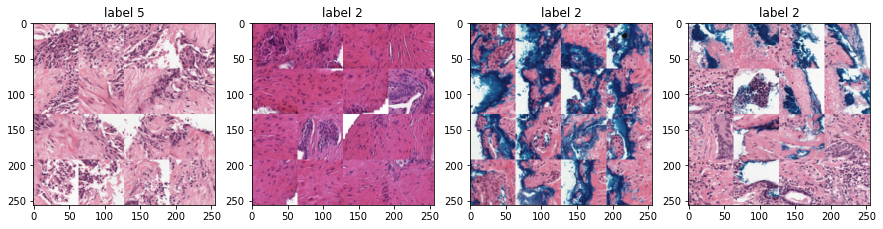

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import training_configs
import pandas as pd

import pandaGenerator


config=training_configs.efficientNetB2_config
# config=training_configs.seresnext50_config
#config=training_configs.densenet121_config
#config=training_configs.vgg16_config
df = pd.read_csv(config.train_csv)
df = df.sample(frac=1, random_state=config.seed).reset_index(drop=True)

train_datagen = pandaGenerator.PANDAGenerator(
    df=df, 
    config=config,
    mode='fit', 
    apply_tfms=False,
    shuffle=True, 
)

Xt, yt = train_datagen.__getitem__(0)

print('Shape of X: ', Xt.shape)
print('Shape of y: ', yt.shape)

fig, ax = plt.subplots(figsize=(15, 15), ncols=4)

for i in range(4):
    ax[i].imshow(Xt[i])
    ax[i].set_title('label {}'.format(np.argmax(yt[i, ])))
plt.show()



In [19]:
import tensorflow as tf
import tensorflow_addons
model=tf.keras.models.load_model("modelcheckpoints/{}/{}.h5".format(config.train_data_name,config.model_name))



tf.Tensor([[0.08933098 0.18806013 0.15603262 0.20708892 0.1539205  0.20556684]], shape=(1, 6), dtype=float32)
tf.Tensor([[0.08992079 0.18652384 0.15503235 0.2080193  0.15561116 0.20489252]], shape=(1, 6), dtype=float32)
tf.Tensor([[0.08626558 0.18059063 0.1487912  0.21653582 0.15985157 0.20796521]], shape=(1, 6), dtype=float32)
tf.Tensor([[0.09305175 0.19058281 0.15959635 0.20163888 0.15291645 0.20221378]], shape=(1, 6), dtype=float32)
tf.Tensor([[0.08674786 0.18155035 0.14978756 0.21521519 0.15905261 0.20764647]], shape=(1, 6), dtype=float32)
tf.Tensor([[0.08155163 0.17246853 0.14034404 0.22817521 0.16564338 0.21181731]], shape=(1, 6), dtype=float32)
tf.Tensor([[0.08990346 0.18644863 0.1550493  0.2080316  0.15554461 0.20502248]], shape=(1, 6), dtype=float32)
tf.Tensor([[0.08272431 0.17468056 0.14278597 0.2252573  0.16349538 0.21105643]], shape=(1, 6), dtype=float32)
tf.Tensor([[0.08978664 0.18444152 0.15338577 0.21002427 0.15718871 0.20517309]], shape=(1, 6), dtype=float32)
tf.Tensor(

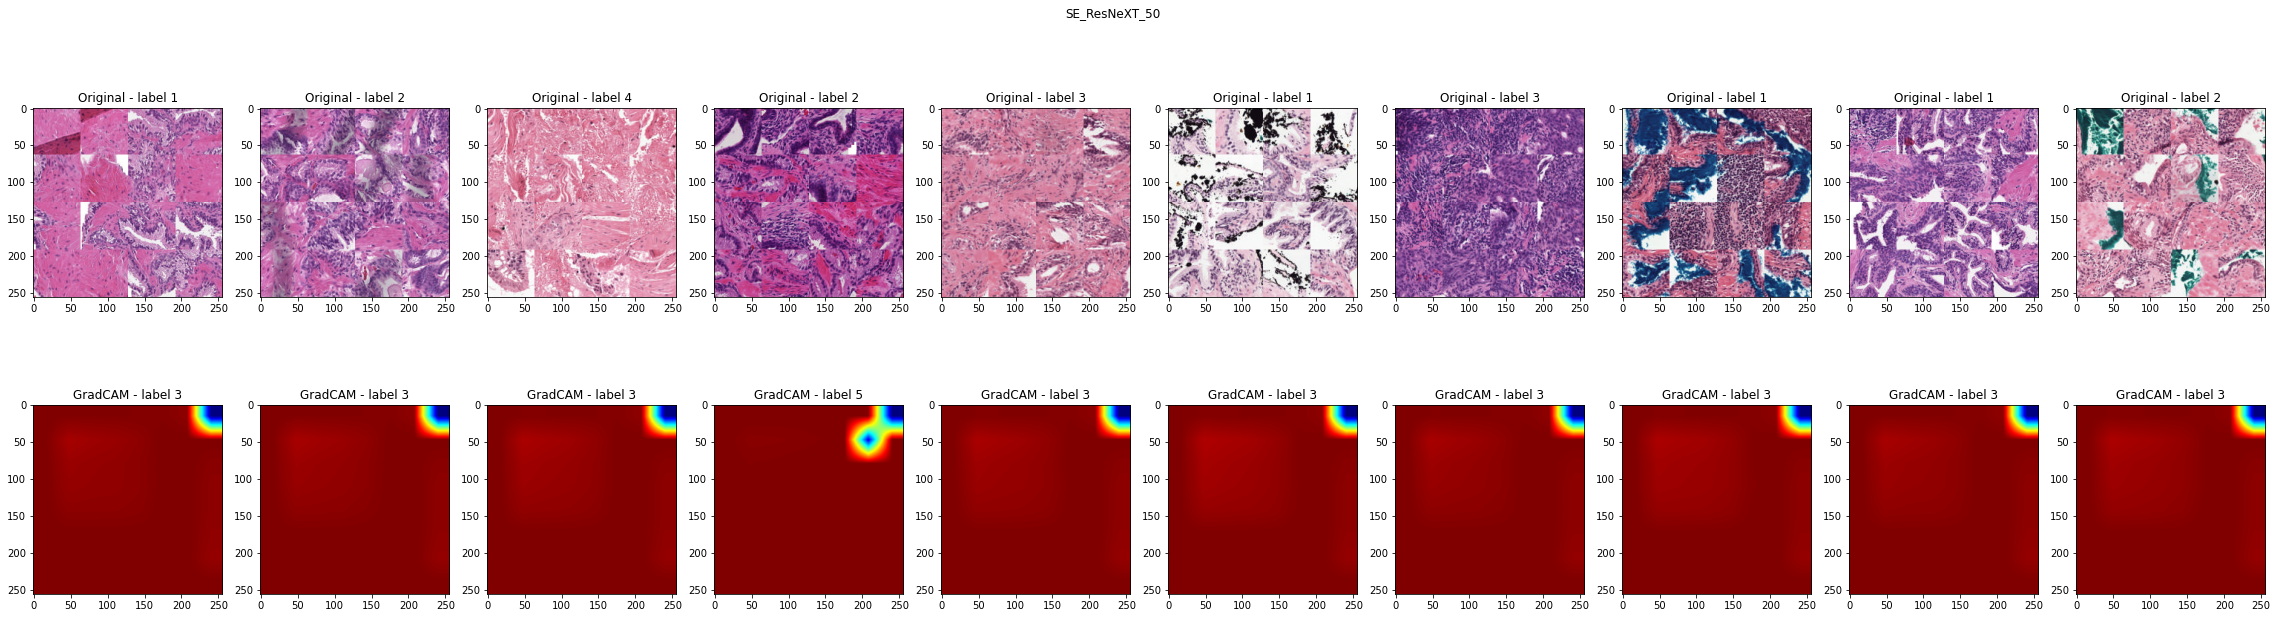

In [23]:
import matplotlib.pyplot as plt
import cv2
from numpy import random
import gradcam
fig, ax = plt.subplots(figsize=(40, 10), ncols=10, nrows=2)


for i in range(10):
    raw_image, y = train_datagen.__getitem__(random.randint(50))
    image = np.expand_dims(raw_image[0], axis=0)
    heatmap,prediction = gradcam.make_gradcam_heatmap(image, model, config.last_conv_layer_name, config.classifier_layer_names)
    superimposed_image = gradcam.create_superimposed_visualization(raw_image[0], heatmap,cv2.COLORMAP_JET)

    ax[0][i].imshow(raw_image[0])
    ax[0][i].set_title('Original - label {}'.format(np.argmax(y[0])))
    ax[1][i].imshow(superimposed_image)
    ax[1][i].set_title('GradCAM - label {}'.format(prediction))

fig.suptitle('SE_ResNeXT_50')
plt.show()